In [1]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from pandas import read_csv

import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import collections
%matplotlib inline

Using TensorFlow backend.
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jocelyn/opt/anaconda3/lib/pytho

# standardization

In [2]:
path = glob.glob('../Users/XiaonfengWang/Desktop/TrafficNet/TrafficNetToVolvo_CutIn/*.csv')

X_all = np.empty((1, 51))
Y_all = np.empty((1,))

for i in range(len(path)):
    print(i)
    
    CutIn = pd.read_csv(path[i], usecols=['LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu','AxWsu','CutIn','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o3','o4','o5','o6','o7','r1','r2','r3','r4','r5','r6','r7','rr1','rr2','rr3','rr4','rr5','rr6','rr7','t1','t2','t3','t4','t5','t6','t7','tt1','tt2','tt3','tt4','tt5','tt6','tt7','c1','c2','c3','c4','c5','c6','c7'])
    
    CutIn.fillna(-1, inplace=True)
    
    Y_train = np.array(CutIn['CutIn'].values)
    X_train = np.array(CutIn[['LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu','AxWsu','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o3','o4','o5','o6','o7','r1','r2','r3','r4','r5','r6','r7','rr1','rr2','rr3','rr4','rr5','rr6','rr7','t1','t2','t3','t4','t5','t6','t7','tt1','tt2','tt3','tt4','tt5','tt6','tt7','c1','c2','c3','c4','c5','c6','c7']])
             
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train.shape[1]
             
    #print('dimof_input_train: ', dimof_input)
    #print('dimof_output_train: ', dimof_output)

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #print(len(X_train))
    print(X_train.shape, Y_train.shape)
    
    # Set y as categorical data
    #Y_train = np_utils.to_categorical(Y_train, dimof_output)
    #print(len(Y_train))
    
    X_all = np.append(X_all, X_train, axis=0)
    Y_all = np.append(Y_all, Y_train, axis=0)

0
(5976, 51) (5976,)
1
(2423, 51) (2423,)
2
(2345, 51) (2345,)
3
(3696, 51) (3696,)
4
(25025, 51) (25025,)
5
(1177, 51) (1177,)
6
(2178, 51) (2178,)
7
(5528, 51) (5528,)
8
(6143, 51) (6143,)
9
(6731, 51) (6731,)
10
(1944, 51) (1944,)
11
(99130, 51) (99130,)
12
(1404, 51) (1404,)
13
(14184, 51) (14184,)
14
(2829, 51) (2829,)
15
(5314, 51) (5314,)
16
(3303, 51) (3303,)
17
(1512, 51) (1512,)
18
(110769, 51) (110769,)
19
(7328, 51) (7328,)
20
(7946, 51) (7946,)
21
(89520, 51) (89520,)
22
(2739, 51) (2739,)
23
(519, 51) (519,)
24
(5560, 51) (5560,)
25
(3787, 51) (3787,)
26
(691, 51) (691,)
27
(8180, 51) (8180,)
28
(2330, 51) (2330,)
29
(6807, 51) (6807,)
30
(764, 51) (764,)
31
(6193, 51) (6193,)
32
(8186, 51) (8186,)
33
(1992, 51) (1992,)
34
(7704, 51) (7704,)
35
(7601, 51) (7601,)
36
(5814, 51) (5814,)
37
(5027, 51) (5027,)
38
(7710, 51) (7710,)
39
(85656, 51) (85656,)
40
(14261, 51) (14261,)
41
(8030, 51) (8030,)
42
(279, 51) (279,)
43
(8459, 51) (8459,)
44
(1009, 51) (1009,)
45
(7322, 51

In [7]:
len(X_all)

613026

In [3]:
X_all = X_all[1:613026]
Y_all = Y_all[1:613026]

# Feature selection

## ANOVA f-test Feature Selection

In [13]:
# example of anova f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

In [8]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [12 19 26 33 40 47] are constant.
  UserWarning)
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Feature 0: 1.604626
Feature 1: 8.510065
Feature 2: 99.898695
Feature 3: 424.428779
Feature 4: 424.017030
Feature 5: 2.195810
Feature 6: 10.706128
Feature 7: 102.228578
Feature 8: 207.094854
Feature 9: 1518.725616
Feature 10: 1.550086
Feature 11: 13.170481
Feature 12: nan
Feature 13: 1.304493
Feature 14: 0.718978
Feature 15: 0.059626
Feature 16: 7364.237690
Feature 17: 85.087863
Feature 18: 0.628862
Feature 19: nan
Feature 20: 1.394406
Feature 21: 0.770721
Feature 22: 0.062312
Feature 23: 349.197660
Feature 24: 39.953973
Feature 25: 32.600662
Feature 26: nan
Feature 27: 0.381406
Feature 28: 0.151846
Feature 29: 0.041223
Feature 30: 1.306866
Feature 31: 9.723084
Feature 32: 0.896796
Feature 33: nan
Feature 34: 0.264119
Feature 35: 0.373614
Feature 36: 0.097079
Feature 37: 742.845767
Feature 38: 2.919856
Feature 39: 19.992031
Feature 40: nan
Feature 41: 1.270404
Feature 42: 0.687886
Feature 43: 0.042855
Feature 44: 215.042276
Feature 45: 0.244813
Feature 46: 6.008691
Feature 47: nan
Featu

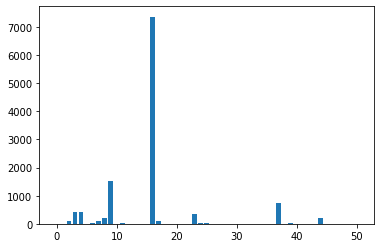

In [14]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.5, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## Mutual Information Feature Selection

In [4]:
# example of mutual information feature selection for numerical input data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

In [ ]:
# feature selection
def Mutual_select_features(X_train, y_train, X_test):
	# configure to select all features
	fsm = SelectKBest(score_func=mutual_info_classif, k='all')
	# learn relationship from training data
	fsm.fit(X_train, y_train)
	# transform train input data
	X_train_fsm = fsm.transform(X_train)
	# transform test input data
	X_test_fsm = fsm.transform(X_test)
	return X_train_fsm, X_test_fsm, fsm

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.5, random_state=1)
# feature selection
X_train_fsm, X_test_fsm, fsm = Mutual_select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fsm.scores_)):
	print('Feature %d: %f' % (i, fsm.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fsm.scores_))], fsm.scores_)
pyplot.show()

# Modeling With Selected Features

## Model Built Using All Features

In [14]:
# evaluation of a model using all input features
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 98.75


## Model Built Using ANOVA f-test Features

In [18]:
# evaluation of a model using 4 features chosen with anova f-test
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_classif, k=10)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat_anova = model.predict(X_test_fs)
# evaluate predictions
accuracy_anova = accuracy_score(y_test, yhat_anova)
print('Accuracy: %.2f' % (accuracy_anova*100))

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [12 19 26 33 40 47] are constant.
  UserWarning)
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Accuracy: 98.75


## Tune the Number of Selected Features

In [2]:
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import glob

In [3]:
path = glob.glob('../Users/XiaonfengWang/Desktop/TrafficNet/TrafficNetToVolvo_CutIn/*.csv')

X_all = np.empty((1, 51))
Y_all = np.empty((1,))

for i in range(20):
    print(i)
    
    CutIn = pd.read_csv(path[i], usecols=['LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu','AxWsu','CutIn','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o3','o4','o5','o6','o7','r1','r2','r3','r4','r5','r6','r7','rr1','rr2','rr3','rr4','rr5','rr6','rr7','t1','t2','t3','t4','t5','t6','t7','tt1','tt2','tt3','tt4','tt5','tt6','tt7','c1','c2','c3','c4','c5','c6','c7'])
    
    CutIn.fillna(-1, inplace=True)
    
    Y_train = np.array(CutIn['CutIn'].values)
    X_train = np.array(CutIn[['LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu','AxWsu','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o3','o4','o5','o6','o7','r1','r2','r3','r4','r5','r6','r7','rr1','rr2','rr3','rr4','rr5','rr6','rr7','t1','t2','t3','t4','t5','t6','t7','tt1','tt2','tt3','tt4','tt5','tt6','tt7','c1','c2','c3','c4','c5','c6','c7']])
             
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train.shape[1]
             
    #print('dimof_input_train: ', dimof_input)
    #print('dimof_output_train: ', dimof_output)

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #print(len(X_train))
    print(X_train.shape, Y_train.shape)
    
    # Set y as categorical data
    #Y_train = np_utils.to_categorical(Y_train, dimof_output)
    #print(len(Y_train))
    
    X_all = np.append(X_all, X_train, axis=0)
    Y_all = np.append(Y_all, Y_train, axis=0)

0
(5976, 51) (5976,)
1
(2423, 51) (2423,)
2
(2345, 51) (2345,)
3
(3696, 51) (3696,)
4
(25025, 51) (25025,)
5
(1177, 51) (1177,)
6
(2178, 51) (2178,)
7
(5528, 51) (5528,)
8
(6143, 51) (6143,)
9
(6731, 51) (6731,)
10
(1944, 51) (1944,)
11
(99130, 51) (99130,)
12
(1404, 51) (1404,)
13
(14184, 51) (14184,)
14
(2829, 51) (2829,)
15
(5314, 51) (5314,)
16
(3303, 51) (3303,)
17
(1512, 51) (1512,)
18
(110769, 51) (110769,)
19
(7328, 51) (7328,)


In [4]:
len(X_all)

308940

In [5]:
X_all = X_all[1:308940]
Y_all = Y_all[1:308940]

In [9]:
# compare different numbers of features selected using anova f-test


# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X_all.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X_all, Y_all)
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.992
Best Config: {'anova__k': 2}


/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [12 19 26 33 40 47] are constant.
  UserWarning)
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


>1 0.992 (0.000)
>2 0.992 (0.000)
>3 0.992 (0.000)
>4 0.992 (0.000)
>5 0.992 (0.000)
>6 0.992 (0.000)
>7 0.992 (0.000)
>8 0.992 (0.000)
>9 0.992 (0.000)
>10 0.992 (0.000)
>11 0.992 (0.000)
>12 0.992 (0.000)
>13 0.992 (0.000)
>14 0.992 (0.000)
>15 0.992 (0.000)
>16 0.992 (0.000)
>17 0.992 (0.000)
>18 0.992 (0.000)
>19 0.992 (0.000)
>20 0.992 (0.000)
>21 0.992 (0.000)
>22 0.992 (0.000)
>23 0.992 (0.000)
>24 0.992 (0.000)
>25 0.992 (0.000)
>26 0.992 (0.000)
>27 0.992 (0.000)
>28 0.992 (0.000)
>29 0.992 (0.000)
>30 0.992 (0.000)
>31 0.992 (0.000)
>32 0.992 (0.000)
>33 0.992 (0.000)
>34 0.992 (0.000)
>35 0.992 (0.000)
>36 0.992 (0.000)
>37 0.992 (0.000)
>38 0.992 (0.000)
>39 0.992 (0.000)
>40 0.992 (0.000)
>41 0.992 (0.000)
>42 0.992 (0.000)
>43 0.992 (0.000)
>44 0.992 (0.000)
>45 0.992 (0.000)
>46 0.992 (0.000)
>47 0.992 (0.000)
>48 0.992 (0.000)
>49 0.992 (0.000)
>50 0.992 (0.000)
>51 0.992 (0.000)


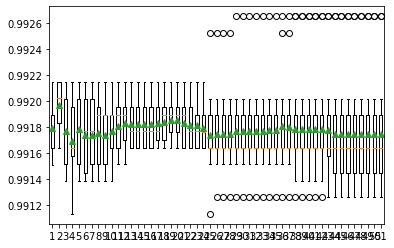

In [10]:
# compare different numbers of features selected using anova f-test


# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_all, Y_all, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define number of features to evaluate
num_features = [i+1 for i in range(X_all.shape[1])]
# enumerate each number of features
results = list()
for k in num_features:
	# create pipeline
	model = LogisticRegression(solver='liblinear')
	fs = SelectKBest(score_func=f_classif, k=k)
	pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
	# evaluate the model
	scores = evaluate_model(pipeline)
	results.append(scores)
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

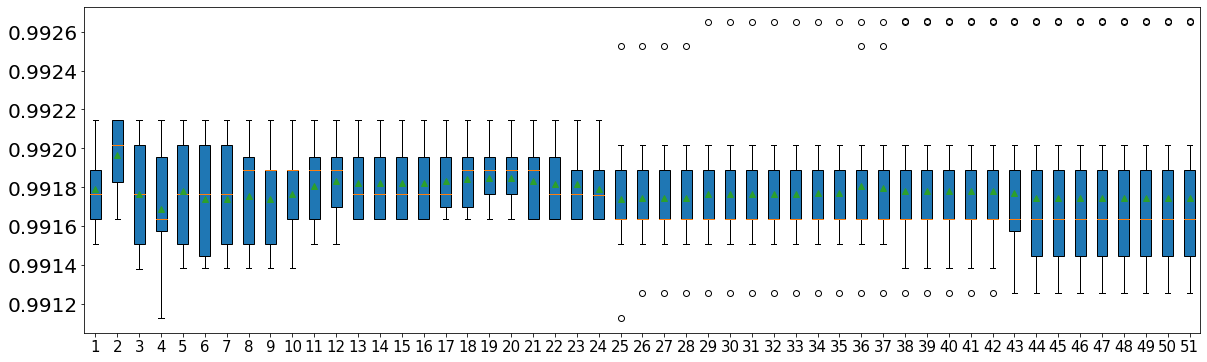

In [68]:
pyplot.figure(figsize=(20,6))
pyplot.boxplot(results, labels=num_features, showmeans=True, patch_artist=True)
pyplot.xticks(fontsize=15)
pyplot.yticks(fontsize=20)
pyplot.show()

In [70]:
pyplot.savefig('boxplot.png',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

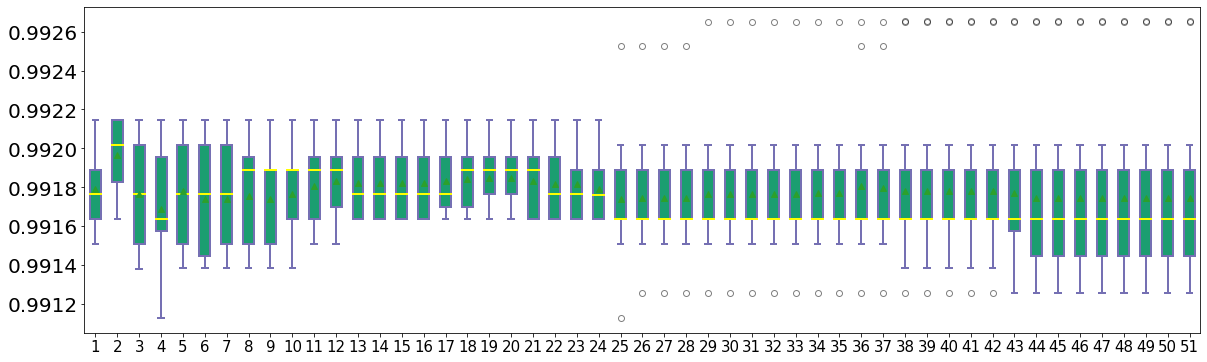

In [62]:
pyplot.figure(figsize=(20,6))
pyplot.xticks(fontsize=15)
pyplot.yticks(fontsize=20)

bp = pyplot.boxplot(results, labels=num_features, showmeans=True, patch_artist=True)
#ax = fig.add_subplot(111)
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e70' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='yellow', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

## the final 21 features

In [6]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k=21)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [12 19 26 33 40 47] are constant.
  UserWarning)
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Feature 0: 0.011998
Feature 1: 16.112282
Feature 2: 3.034105
Feature 3: 126.467080
Feature 4: 128.532589
Feature 5: 47.217913
Feature 6: 6.998053
Feature 7: 5.484125
Feature 8: 129.497631
Feature 9: 501.846869
Feature 10: 8.208881
Feature 11: 12.778113
Feature 12: nan
Feature 13: 0.537253
Feature 14: 0.354145
Feature 15: 0.078966
Feature 16: 2717.514251
Feature 17: 7.769623
Feature 18: 18.557991
Feature 19: nan
Feature 20: 0.605286
Feature 21: 0.386928
Feature 22: 0.076940
Feature 23: 77.281670
Feature 24: 9.464861
Feature 25: 24.047635
Feature 26: nan
Feature 27: 0.247245
Feature 28: 0.240207
Feature 29: 0.025469
Feature 30: 0.916249
Feature 31: 20.306635
Feature 32: 7.848061
Feature 33: nan
Feature 34: 0.054474
Feature 35: 0.196904
Feature 36: 0.024831
Feature 37: 23.413544
Feature 38: 0.076796
Feature 39: 1.140303
Feature 40: nan
Feature 41: 0.493572
Feature 42: 0.327598
Feature 43: 0.076955
Feature 44: 60.851977
Feature 45: 0.045743
Feature 46: 16.418940
Feature 47: nan
Feature 48:

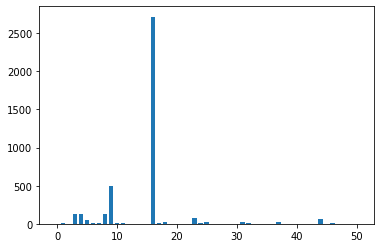

In [7]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.5, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [8]:
fs.get_support(indices=True)

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 16, 17, 18, 23, 24, 25, 31,
       32, 37, 44, 46])

# Layer decision of LSTM for CutIn_Net

In [2]:
# Set up a 'look back' dataset for sequence to label prediction with Keras.

# The LSTM network expects the input data (X) to be provided with a specific
# array structure in the form of: [samples, time steps, features].

# create_dataset is adapted from
# http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

def create_dataset(X, Y, **options):
    """Convert an array of X, Y values into a dataset matrix for and LSTM"""
    
    look_back = options.pop('look_back', None)
    dataX, dataY = [], []
    for i in range(len(X) - look_back):
        a = X[i:(i+look_back)]
        dataX.append(a)
        dataY.append(Y[i + look_back - 1])
    return np.array(dataX), np.array(dataY)

# Predictions will be based on look_back minutes of data:
look_back = 50

In [3]:
path = glob.glob('../Users/XiaonfengWang/Desktop/TrafficNet/TrafficNetToVolvo_CutIn/*.csv')

X_all = np.empty((1, 50, 21))
Y_all = np.empty((1,))

for i in range(len(path)):
    print(i)
    
    CutIn = pd.read_csv(path[i], usecols=['LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu','LaneDistanceLeft','LaneDistanceRight','LaneHeading','CutIn','o1','o2','o3','r1','r2','r3','t1','t2','t3','tt2','tt3','c2','c3']) 
    CutIn.fillna(-1, inplace=True)
    
    Y_train = np.array(CutIn['CutIn'].values)
    X_train = np.array(CutIn[['LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o3','r1','r2','r3','t1','t2','t3','tt2','tt3','c2','c3']])
    
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train.shape[1]
             
    #print('dimof_input_train: ', dimof_input)
    #print('dimof_output_train: ', dimof_output)

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #print(len(X_train))
    print(X_train.shape, Y_train.shape)
    
    # Set y as categorical data
    #Y_train = np_utils.to_categorical(Y_train, dimof_output)
    #print(len(Y_train))
    
    X, Y = create_dataset(X_train, Y_train, look_back=look_back)
    print(X.shape, Y.shape)
    
    X_all = np.append(X_all, X, axis=0)
    Y_all = np.append(Y_all, Y, axis=0)

0
(5976, 21) (5976,)
(5926, 50, 21) (5926,)
1
(2423, 21) (2423,)
(2373, 50, 21) (2373,)
2
(2345, 21) (2345,)
(2295, 50, 21) (2295,)
3
(3696, 21) (3696,)
(3646, 50, 21) (3646,)
4
(25025, 21) (25025,)
(24975, 50, 21) (24975,)
5
(1177, 21) (1177,)
(1127, 50, 21) (1127,)
6
(2178, 21) (2178,)
(2128, 50, 21) (2128,)
7
(5528, 21) (5528,)
(5478, 50, 21) (5478,)
8
(6143, 21) (6143,)
(6093, 50, 21) (6093,)
9
(6731, 21) (6731,)
(6681, 50, 21) (6681,)
10
(1944, 21) (1944,)
(1894, 50, 21) (1894,)
11
(99130, 21) (99130,)
(99080, 50, 21) (99080,)
12
(1404, 21) (1404,)
(1354, 50, 21) (1354,)
13
(2829, 21) (2829,)
(2779, 50, 21) (2779,)
14
(5314, 21) (5314,)
(5264, 50, 21) (5264,)
15
(3303, 21) (3303,)
(3253, 50, 21) (3253,)
16
(1512, 21) (1512,)
(1462, 50, 21) (1462,)
17
(110769, 21) (110769,)
(110719, 50, 21) (110719,)
18
(7328, 21) (7328,)
(7278, 50, 21) (7278,)
19
(7946, 21) (7946,)
(7896, 50, 21) (7896,)
20
(89520, 21) (89520,)
(89470, 50, 21) (89470,)
21
(2739, 21) (2739,)
(2689, 50, 21) (2689,)


In [5]:
(len(X_all)//64)*64 + 1

596545

In [4]:
X_all = X_all[1:596545]
Y_all = Y_all[1:596545]

collections.Counter(Y_all)

Counter({1.0: 7461, 0.0: 589083})

In [8]:
7461/589083*100

1.266544782314207

In [5]:
# Create the LSTM network.
batch_size = 32
dropout = 0.5
num_epoch = 100
earlyStopping = EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')
weights = {0:1, 1:100}

In [6]:
# Shared Feature Extraction Layer
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM
from keras.layers.merge import concatenate

In [9]:
def Functional1():
    # define input
    visible = Input(shape=(50,27))
    # feature extraction
    extract1 = LSTM(10)(visible)
    # first interpretation model
    interp1 = Dense(10, activation='relu')(extract1)
    # second interpretation model
    interp11 = Dense(10, activation='relu')(extract1)
    interp12 = Dense(20, activation='relu')(interp11)
    interp13 = Dense(10, activation='relu')(interp12)
    # merge interpretation
    merge = concatenate([interp1, interp13])
    # output
    output = Dense(1, activation='sigmoid')(merge)
    model = Model(inputs=visible, outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Functional1 = Functional1()
Functional1.fit(X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

#_, accuracy = model.evaluate(X, trainY)
#print('Accuracy: %.2f' % (accuracy*100))

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 305344 samples, validate on 305344 samples
Epoch 1/100
305344/305344 [==============================] - 1696s 6ms/step - loss: 0.6426 - accuracy: 0.8808 - val_loss: 2.6898 - val_accuracy: 0.7810
Epoch 2/100
305344/305344 [==============================] - 1757s 6ms/step - loss: 0.3904 - accuracy: 0.9128 - val_loss: 2.9066 - val_accuracy: 0.8027


In [ ]:
# Multilayer Perceptron
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

## 6.6 model_CutIn1 simplest

In [10]:
model_CutIn1 = Sequential()
model_CutIn1.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_CutIn1.add(Dropout(dropout))
model_CutIn1.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_CutIn1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=10)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
model_CutIn1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (32, 10)                  1280      
_________________________________________________________________
dropout_1 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_1 (Dense)              (32, 1)                   11        
Total params: 1,291
Trainable params: 1,291
Non-trainable params: 0
_________________________________________________________________


In [12]:
history1 = model_CutIn1.fit(
    X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys



Train on 298272 samples, validate on 298272 samples
Epoch 1/100
298272/298272 [==============================] - 1136s 4ms/step - loss: 0.9335 - accuracy: 0.7745 - val_loss: 1.4903 - val_accuracy: 0.8044
Epoch 2/100
298272/298272 [==============================] - 1024s 3ms/step - loss: 0.6830 - accuracy: 0.8361 - val_loss: 1.7643 - val_accuracy: 0.8754


In [13]:
history1.history

{'val_loss': [1.4902933307173702, 1.7643374966691991],
 'val_accuracy': [0.8043631315231323, 0.8753553628921509],
 'loss': [0.9335409086567306, 0.682951611249587],
 'accuracy': [0.7744542, 0.83608586]}

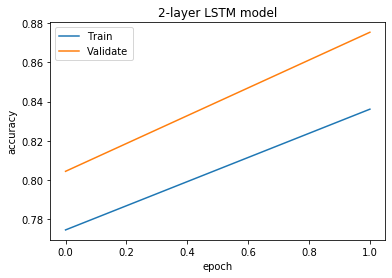

In [14]:
# Plot history for training and validation loss.

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('2-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

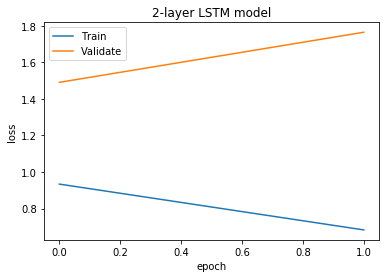

In [15]:
# Plot history for training and validation loss.

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('2-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

## 2 hidden layers

In [16]:
model_CutIn2 = Sequential()
model_CutIn2.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_CutIn2.add(Dropout(dropout))
model_CutIn2.add(Dense(30, activation='relu'))
model_CutIn2.add(Dropout(dropout))
model_CutIn2.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_CutIn2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=10)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [19]:
from keras.utils import plot_model

In [ ]:
plot_model(model_CutIn2)

In [17]:
history2 = model_CutIn2.fit(
    X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 298272 samples, validate on 298272 samples
Epoch 1/100
298272/298272 [==============================] - 1084s 4ms/step - loss: 1.0071 - accuracy: 0.7059 - val_loss: 1.5066 - val_accuracy: 0.7247
Epoch 2/100
298272/298272 [==============================] - 1097s 4ms/step - loss: 0.7894 - accuracy: 0.7372 - val_loss: 2.0250 - val_accuracy: 0.7680


In [17]:
model_CutIn2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (32, 10)                  1880      
_________________________________________________________________
dropout_2 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_2 (Dense)              (32, 30)                  330       
_________________________________________________________________
dropout_3 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_3 (Dense)              (32, 1)                   31        
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


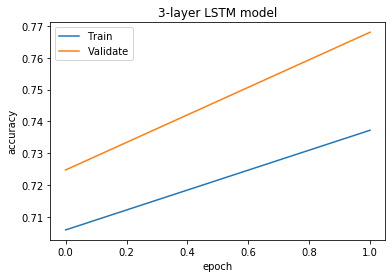

In [18]:
# Plot history for training and validation loss.

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('3-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

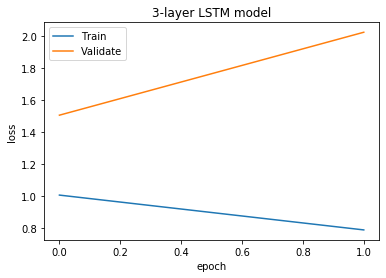

In [19]:
# Plot history for training and validation loss.

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('3-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [20]:
history2.history

{'val_loss': [1.5066250463348254, 2.025043395553832],
 'val_accuracy': [0.7247277498245239, 0.7680338621139526],
 'loss': [1.007069079705976, 0.7893889320646792],
 'accuracy': [0.70586914, 0.737213]}

## Model 3

In [21]:
model_CutIn3 = Sequential()
model_CutIn3.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_CutIn3.add(Dropout(dropout))
model_CutIn3.add(Dense(30, activation='relu'))
model_CutIn3.add(Dropout(dropout))
model_CutIn3.add(Dense(30, activation='relu'))
model_CutIn3.add(Dropout(dropout))
model_CutIn3.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_CutIn3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=10)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [22]:
model_CutIn3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (32, 10)                  1880      
_________________________________________________________________
dropout_4 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_4 (Dense)              (32, 30)                  330       
_________________________________________________________________
dropout_5 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_5 (Dense)              (32, 30)                  930       
_________________________________________________________________
dropout_6 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_6 (Dense)              (32, 1)                  

In [22]:
history3 = model_CutIn3.fit(
    X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 298272 samples, validate on 298272 samples
Epoch 1/100
298272/298272 [==============================] - 1187s 4ms/step - loss: 1.0439 - accuracy: 0.6964 - val_loss: 1.5558 - val_accuracy: 0.7588
Epoch 2/100
298272/298272 [==============================] - 1148s 4ms/step - loss: 0.8471 - accuracy: 0.7308 - val_loss: 1.9920 - val_accuracy: 0.8239


In [23]:
history3.history

{'val_loss': [1.5557986725982071, 1.9920260457398513],
 'val_accuracy': [0.7587805986404419, 0.8238956332206726],
 'loss': [1.043948266368646, 0.8470522745630028],
 'accuracy': [0.69644487, 0.730843]}

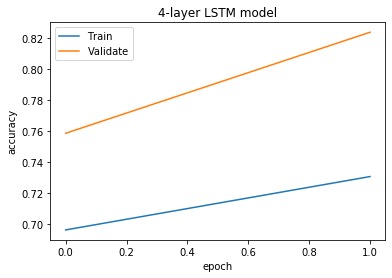

In [24]:
# Plot history for training and validation loss.

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('4-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

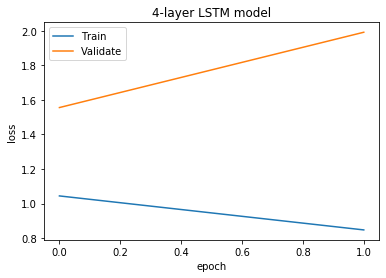

In [25]:
# Plot history for training and validation loss.

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('4-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

## Model 4

In [26]:
model_CutIn4 = Sequential()
model_CutIn4.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_CutIn4.add(Dropout(dropout))
model_CutIn4.add(Dense(30, activation='relu'))
model_CutIn4.add(Dropout(dropout))
model_CutIn4.add(Dense(30, activation='relu'))
model_CutIn4.add(Dropout(dropout))
model_CutIn4.add(Dense(10, activation='relu'))
model_CutIn4.add(Dropout(dropout))
model_CutIn4.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_CutIn4.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=10)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [12]:
model_CutIn4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (32, 10)                  1880      
_________________________________________________________________
dropout_4 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_4 (Dense)              (32, 30)                  330       
_________________________________________________________________
dropout_5 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_5 (Dense)              (32, 30)                  930       
_________________________________________________________________
dropout_6 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_6 (Dense)              (32, 10)                 

In [27]:
history4 = model_CutIn4.fit(
    X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 298272 samples, validate on 298272 samples
Epoch 1/100
298272/298272 [==============================] - 1220s 4ms/step - loss: 1.1078 - accuracy: 0.6648 - val_loss: 1.3385 - val_accuracy: 0.7026
Epoch 2/100
298272/298272 [==============================] - 1227s 4ms/step - loss: 0.8782 - accuracy: 0.6994 - val_loss: 1.6631 - val_accuracy: 0.7205


In [28]:
history4.history

{'val_loss': [1.3385463565080271, 1.6630580398207138],
 'val_accuracy': [0.702643871307373, 0.7205402851104736],
 'loss': [1.1077830144109777, 0.8781549592143015],
 'accuracy': [0.6648328, 0.6993583]}

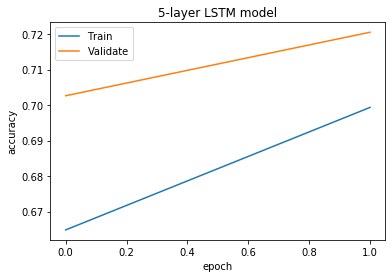

In [29]:
# Plot history for training and validation loss.

plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('5-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

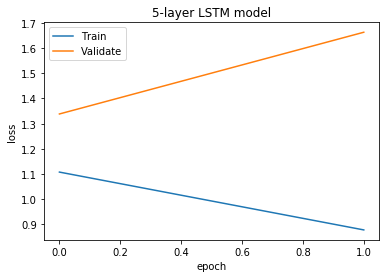

In [30]:
# Plot history for training and validation loss.

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('5-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [33]:
model_CutIn5 = Sequential()
model_CutIn5.add(LSTM(output_dim=30, batch_input_shape=[batch_size, look_back, dimof_input]))
model_CutIn5.add(Dropout(dropout))
model_CutIn5.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_CutIn5.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=30)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [34]:
model_CutIn5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (32, 30)                  6240      
_________________________________________________________________
dropout_11 (Dropout)         (32, 30)                  0         
_________________________________________________________________
dense_11 (Dense)             (32, 1)                   31        
Total params: 6,271
Trainable params: 6,271
Non-trainable params: 0
_________________________________________________________________


In [35]:
history5 = model_CutIn5.fit(
    X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 298272 samples, validate on 298272 samples
Epoch 1/100
298272/298272 [==============================] - 1584s 5ms/step - loss: 0.7671 - accuracy: 0.8373 - val_loss: 2.0212 - val_accuracy: 0.8887
Epoch 2/100
298272/298272 [==============================] - 1784s 6ms/step - loss: 0.4973 - accuracy: 0.9034 - val_loss: 2.9778 - val_accuracy: 0.9066


In [36]:
history5.history

{'val_loss': [2.021237313914242, 2.977776445663319],
 'val_accuracy': [0.8886687159538269, 0.9066120982170105],
 'loss': [0.767136476275306, 0.49729643482505065],
 'accuracy': [0.8372727, 0.9033969]}

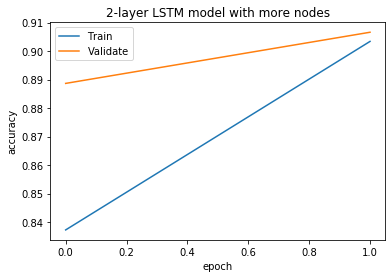

In [37]:
# Plot history for training and validation loss.

plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('2-layer LSTM model with more nodes')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

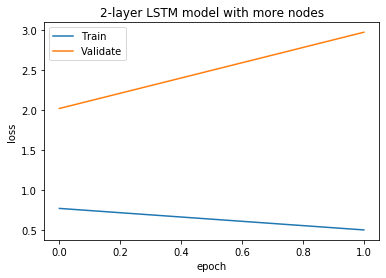

In [38]:
# Plot history for training and validation loss.

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('2-layer LSTM model with more nodes')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [6]:
model_CutIn6 = Sequential()
model_CutIn6.add(LSTM(output_dim=50, batch_input_shape=[batch_size, look_back, dimof_input]))
model_CutIn6.add(Dropout(dropout))
model_CutIn6.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_CutIn6.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=50)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
history6 = model_CutIn6.fit(
    X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys



Train on 298272 samples, validate on 298272 samples
Epoch 1/100
298272/298272 [==============================] - 1352s 5ms/step - loss: 0.7402 - accuracy: 0.8474 - val_loss: 2.0735 - val_accuracy: 0.8870
Epoch 2/100
298272/298272 [==============================] - 1382s 5ms/step - loss: 0.4433 - accuracy: 0.9042 - val_loss: 2.6212 - val_accuracy: 0.8883


In [8]:
model_CutIn6.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (32, 50)                  14400     
_________________________________________________________________
dropout_1 (Dropout)          (32, 50)                  0         
_________________________________________________________________
dense_1 (Dense)              (32, 1)                   51        
Total params: 14,451
Trainable params: 14,451
Non-trainable params: 0
_________________________________________________________________


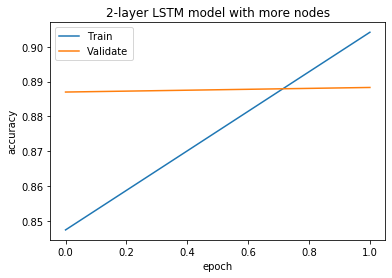

In [9]:
# Plot history for training and validation loss.

plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('2-layer LSTM model with more nodes')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

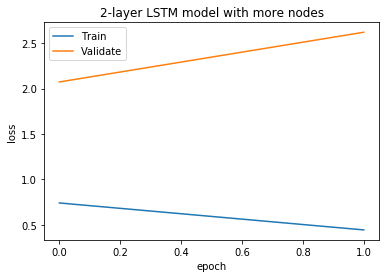

In [10]:
# Plot history for training and validation loss.

plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('2-layer LSTM model with more nodes')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [13]:
model_CutIn7 = Sequential()
model_CutIn7.add(LSTM(output_dim=40, batch_input_shape=[batch_size, look_back, dimof_input]))
model_CutIn7.add(Dropout(dropout))
model_CutIn7.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_CutIn7.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=40)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [14]:
history7 = model_CutIn7.fit(
    X_all, Y_all,
    class_weight=weights,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 298272 samples, validate on 298272 samples
Epoch 1/100
298272/298272 [==============================] - 1257s 4ms/step - loss: 0.7745 - accuracy: 0.8248 - val_loss: 1.8259 - val_accuracy: 0.8236
Epoch 2/100
298272/298272 [==============================] - 1390s 5ms/step - loss: 0.5319 - accuracy: 0.8836 - val_loss: 2.6512 - val_accuracy: 0.8865


In [15]:
model_CutIn7.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (32, 40)                  9920      
_________________________________________________________________
dropout_3 (Dropout)          (32, 40)                  0         
_________________________________________________________________
dense_3 (Dense)              (32, 1)                   41        
Total params: 9,961
Trainable params: 9,961
Non-trainable params: 0
_________________________________________________________________


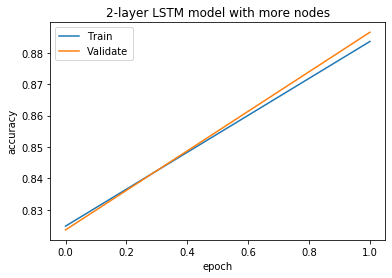

In [16]:
# Plot history for training and validation loss.

plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('2-layer LSTM model with more nodes')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()